<a href="https://colab.research.google.com/github/Romyull-Islam/Logistic-Regression/blob/main/logistic_regresion_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
# Since column headers are not correct, assign corrections to a variable for later use
column_headers = ["age", "sex", "cp","trestbps","chol", "fbs", "restecg",
                        "thalach", "exang", "oldpeak", "slope", "ca", 
                        "thal", "num"]

In [ ]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None, names=column_headers)


In [ ]:
data.shape

(303, 14)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##Exploratory Data Analysis

In [ ]:
vname=data.columns
vname

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
import numpy as np

data.replace(("?","NA"," "), np.nan, inplace = True)

In [ ]:
missing = data.isna().sum()
missing

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
d=data["thal"].isna().sum()
d

2

##percentage of missing values

In [ ]:
a=0
for i in vname:
  x= data[i].isna().sum()
  if x!=0:
    print(i)
    print("missing proportion "+ str(x/len(data.index)))

  a=a+x

print("total missing value = "+ str(a))


ca
missing proportion 0.013201320132013201
thal
missing proportion 0.006600660066006601
total missing value = 6


##  Missing values by visualization

<Axes: >

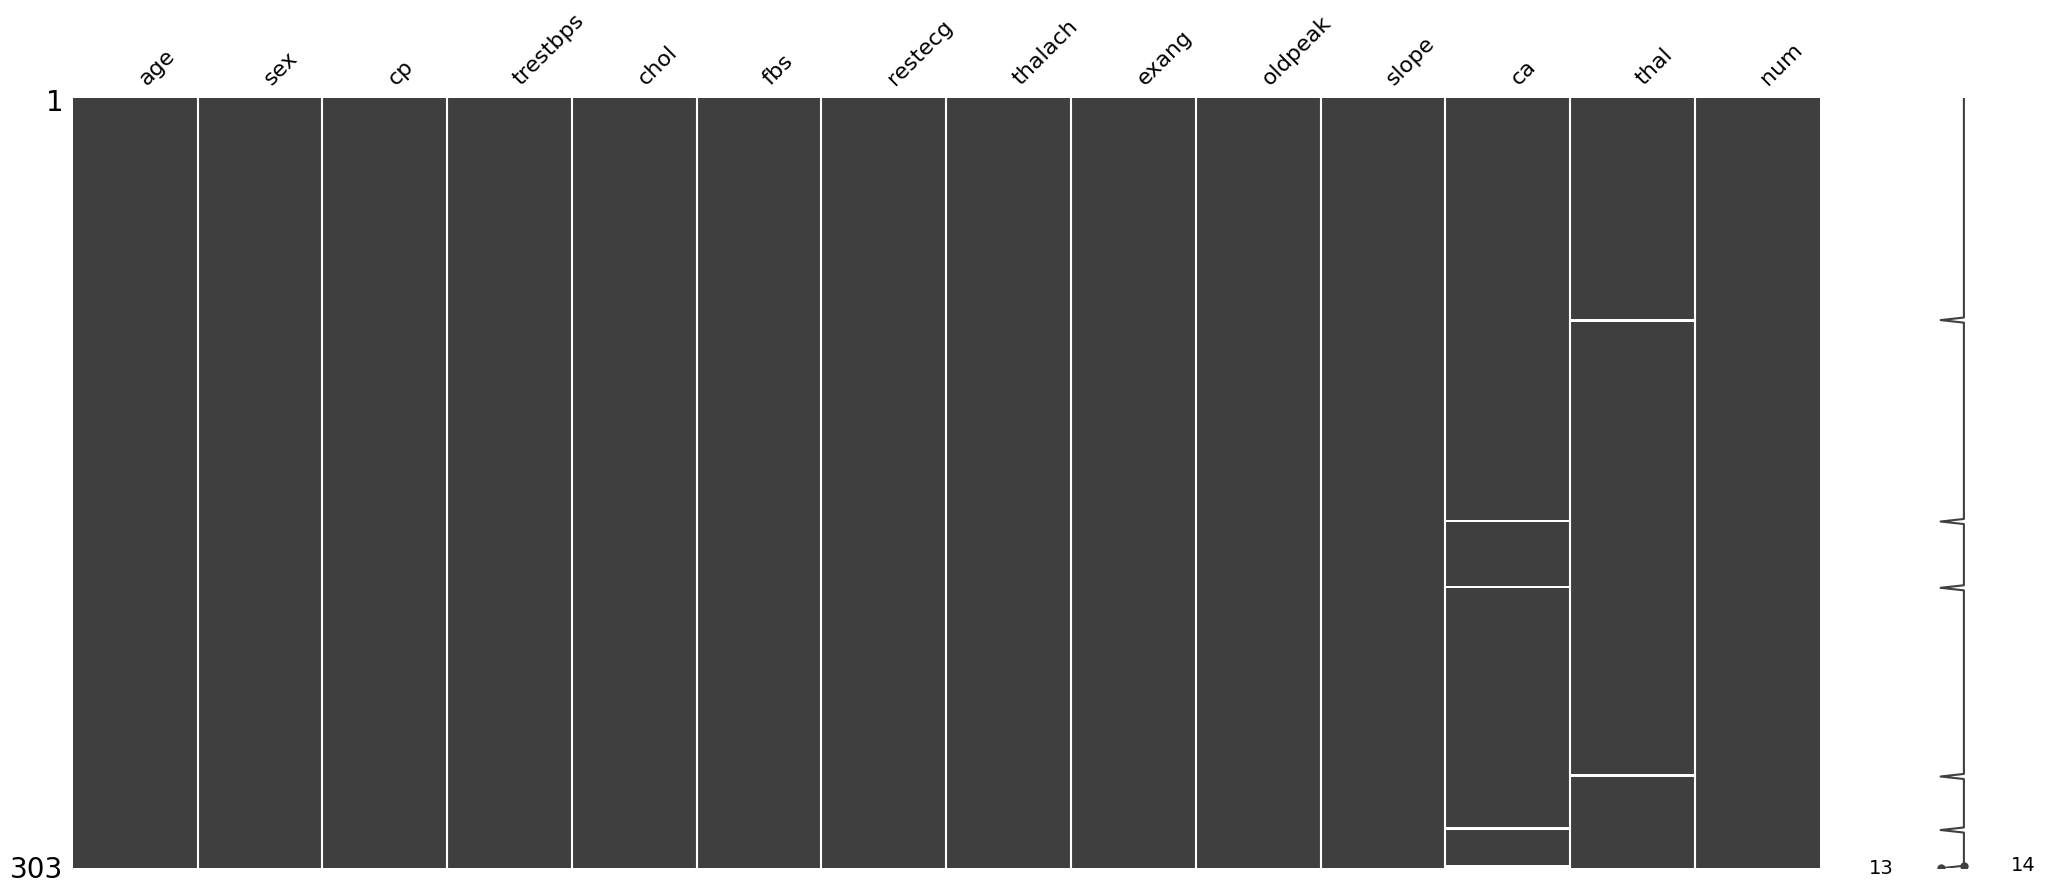

In [ ]:
#visualize missing values
import missingno as msno
msno.matrix(data)

## omitting data

In [ ]:
#Now we can see ca and thal are showing as object variable. So we will change the datatype of the this two variable so that we can impute them as numeric
data["ca"] = pd.to_numeric(data["ca"], errors='coerce')
data["thal"] = pd.to_numeric(data["thal"], errors='coerce')

In [ ]:
data=data.dropna(axis=0)
#shape of dataset after deleting the rows contining null values
data.shape

(297, 14)

## Finding the covariance of the datasets

In [ ]:
np.cov(data)

array([[5807.42181319, 6347.03653846, 5366.86945055, ..., 5129.88      ,
        3893.12241758, 5937.29450549],
       [6347.03653846, 7253.56730769, 5938.93846154, ..., 5544.21538462,
        4140.37692308, 6393.92307692],
       [5366.86945055, 5938.93846154, 5003.51032967, ..., 4712.48307692,
        3535.23824176, 5484.53406593],
       ...,
       [5129.88      , 5544.21538462, 4712.48307692, ..., 4577.19384615,
        3521.24307692, 5233.09230769],
       [3893.12241758, 4140.37692308, 3535.23824176, ..., 3521.24307692,
        2765.13142857, 3956.16703297],
       [5937.29450549, 6393.92307692, 5484.53406593, ..., 5233.09230769,
        3956.16703297, 6133.8021978 ]])

In [ ]:
#we can use this condition if 0 then output will be 0 otherwise 1
data["num"] = np.where(data["num"] == 0, 0, 1)

## Data partition

In [ ]:
labels=data['num']
features = data.drop('num', axis=1)

from sklearn.model_selection import train_test_split

#for initial testing purpose we are spliting train test from train data

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33,shuffle=False, random_state=123)

In [ ]:
y_train.shape

(198,)

## Build a Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,Lasso

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score,precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve

##Using cross validation to determine the optimal tuning parameter.

In [ ]:

lr = LogisticRegressionCV(penalty='l2',Cs=1000, max_iter=1000, cv=10, solver='liblinear', tol=0.001, multi_class="ovr")


In [ ]:
ft=lr.fit(X_train, y_train)

In [ ]:
ft.score(X_train, y_train)

0.8686868686868687

In [ ]:
print(ft.coef_)
print(ft.intercept_)
print(ft.n_features_in_)
print(ft.Cs_)
print(ft.l1_ratios_)

[[-0.0094268   1.64600367  0.93309446  0.03464014  0.00692634 -0.97799502
   0.42545347 -0.03038527  0.65466283  0.21342757  0.50331161  0.94136128
   0.33955399]]
[-9.45299413]
13
[1.00000000e-04 1.01861017e-04 1.03756668e-04 1.05687597e-04
 1.07654461e-04 1.09657929e-04 1.11698682e-04 1.13777413e-04
 1.15894830e-04 1.18051653e-04 1.20248614e-04 1.22486461e-04
 1.24765955e-04 1.27087871e-04 1.29452998e-04 1.31862140e-04
 1.34316117e-04 1.36815763e-04 1.39361927e-04 1.41955477e-04
 1.44597292e-04 1.47288272e-04 1.50029332e-04 1.52821404e-04
 1.55665436e-04 1.58562396e-04 1.61513269e-04 1.64519059e-04
 1.67580786e-04 1.70699493e-04 1.73876240e-04 1.77112106e-04
 1.80408193e-04 1.83765620e-04 1.87185529e-04 1.90669084e-04
 1.94217468e-04 1.97831888e-04 2.01513573e-04 2.05263775e-04
 2.09083769e-04 2.12974854e-04 2.16938352e-04 2.20975611e-04
 2.25088005e-04 2.29276931e-04 2.33543814e-04 2.37890104e-04
 2.42317279e-04 2.46826845e-04 2.51420335e-04 2.56099310e-04
 2.60865362e-04 2.65720111

In [ ]:
#best C
c=ft.C_
print(c[0])
#print(ft.C_)


2801.866556459195


##using best perameters 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', tol=0.0001, C=c[0], intercept_scaling=1, solver='liblinear', max_iter=1000, multi_class='ovr')
model.fit(X_train, y_train)

LogisticRegression(C=2801.866556459195, max_iter=1000, multi_class='ovr',
                   penalty='l1', solver='liblinear')

In [ ]:
print(ft.coef_)
print(ft.intercept_)

[[-0.0094268   1.64600367  0.93309446  0.03464014  0.00692634 -0.97799502
   0.42545347 -0.03038527  0.65466283  0.21342757  0.50331161  0.94136128
   0.33955399]]
[-9.45299413]


In [ ]:
prediction = model.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
model.predict_proba(X_test)

array([[5.53588141e-01, 4.46411859e-01],
       [8.71295299e-01, 1.28704701e-01],
       [8.12023523e-01, 1.87976477e-01],
       [7.88499150e-01, 2.11500850e-01],
       [2.66087316e-03, 9.97339127e-01],
       [5.60335117e-03, 9.94396649e-01],
       [4.24009043e-02, 9.57599096e-01],
       [9.67944444e-01, 3.20555559e-02],
       [7.41725229e-01, 2.58274771e-01],
       [9.94676405e-01, 5.32359502e-03],
       [9.02123071e-01, 9.78769286e-02],
       [7.71984408e-01, 2.28015592e-01],
       [1.62006367e-01, 8.37993633e-01],
       [8.21002707e-01, 1.78997293e-01],
       [9.07493526e-01, 9.25064739e-02],
       [9.99042235e-01, 9.57764580e-04],
       [6.93001263e-01, 3.06998737e-01],
       [2.93386914e-01, 7.06613086e-01],
       [7.31813332e-01, 2.68186668e-01],
       [9.74727794e-01, 2.52722060e-02],
       [9.88196120e-01, 1.18038800e-02],
       [9.98606107e-01, 1.39389311e-03],
       [6.11823795e-03, 9.93881762e-01],
       [7.03130276e-01, 2.96869724e-01],
       [9.988559

#Confusion metrics

In [ ]:
confusion_matrix(y_test, prediction)

array([[48,  4],
       [15, 32]])

In [ ]:
#Accuracy
print(accuracy_score(y_test, prediction).round(2))
# Precision
print(precision_score(y_test, prediction).round(2))
# Recall
print(recall_score(y_test, prediction).round(2))
# F1 Score
print(f1_score(y_test, prediction).round(2))

0.81
0.89
0.68
0.77


In [ ]:
#or we can use this to get Accuracy,  precision ,   recall,  f1-score
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        52
           1       0.89      0.68      0.77        47

    accuracy                           0.81        99
   macro avg       0.83      0.80      0.80        99
weighted avg       0.82      0.81      0.80        99



##Cohen Kappa


In [ ]:
print(cohen_kappa_score(y_test, prediction))

0.6108007448789572


## Finidng MSE

In [ ]:
# Mean Squared Error
mean_squared_error(y_test,prediction)

0.1919191919191919

## Finding missclassification rate

In [ ]:
(1-accuracy_score(y_test, prediction)).round(2)

0.19

##roc curve

area under ROC 0.8


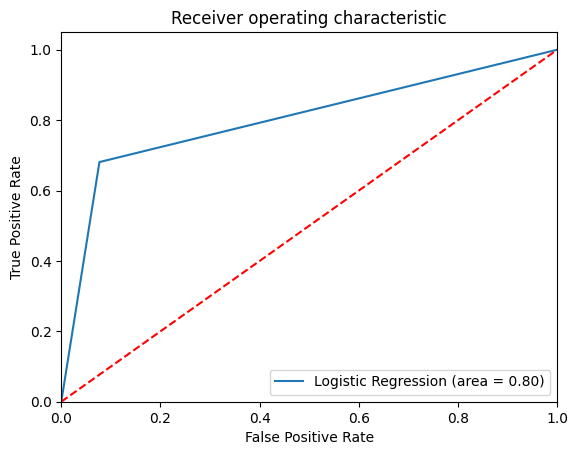

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,precision_recall_curve
import matplotlib.pyplot as plt

print("area under ROC " + str(roc_auc_score(y_test, prediction).round(2)))

logit_roc_auc = roc_auc_score(y_test, prediction)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

0.385880077369439


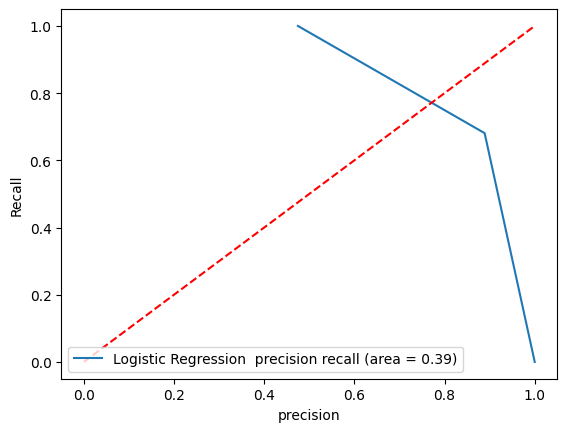

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction)
from sklearn.metrics import auc
auc_precision_recall = auc(precision, recall)
print(auc_precision_recall)
plt.plot(precision, recall, label='Logistic Regression  precision recall (area = %0.2f)' % auc_precision_recall)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc="lower right")
plt.xlabel('precision')
plt.ylabel('Recall')
plt.legend(loc="lower left")
plt.show()

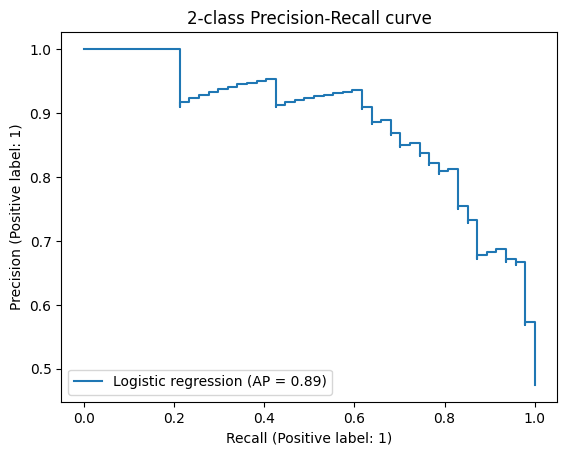

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name="Logistic regression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")